<a href="https://colab.research.google.com/github/KauaHenSilva/python_autoencoders/blob/main/autoencode_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Baixando database

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten, Input

In [97]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [98]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

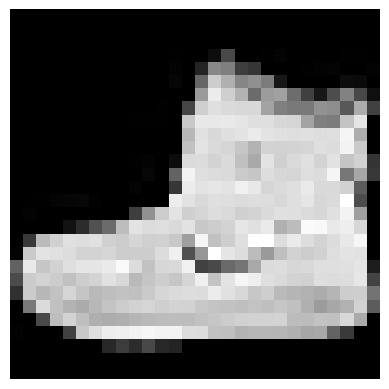

In [99]:
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

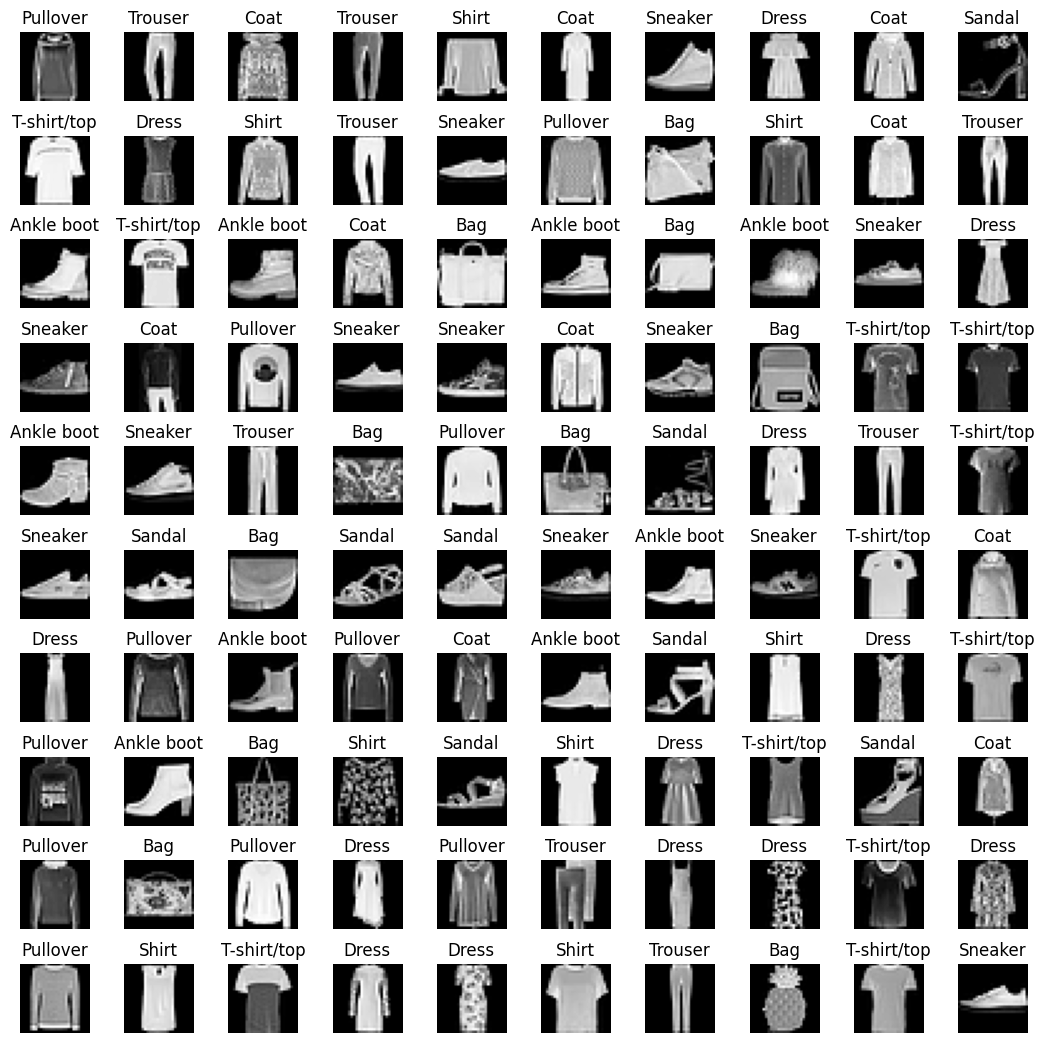

In [100]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

altura = 5
largura = 5

fig, axs = plt.subplots(altura, largura, figsize=(13, 13))
for i in range(altura):
    for j in range(largura):
        idx = np.random.randint(0, len(x_train))

        axs[i, j].imshow(x_train[idx], cmap='gray')
        axs[i, j].set_title(class_names[y_train[idx]])
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Pré-processamento

In [101]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [102]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [103]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [104]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Construção e treinamento

In [106]:
from os import name
network = Sequential()
network.add(Input(shape=(28, 28, 1)))

network.add(Conv2D(16, (3, 3), activation='relu', padding='valid',                name='1-Conv2d'))
network.add(MaxPooling2D((2, 2),                                                  name='2-MaxPooling2D'))
network.add(Conv2D(8, (3, 3), activation='relu', padding='same',                  name='3-Conv2d'))
network.add(MaxPooling2D((2, 2), padding='same',                                  name='4-MaxPooling2D'))
network.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=(2, 2),  name='5-Conv2d'))
network.add(Flatten(                                                              name='6-flatten'))
network.add(Reshape((4, 4, 8),                                                    name='7-reshape'))
network.add(Conv2D(8, (3, 3), activation='relu', padding='same',                  name='8-Conv2d'))
network.add(UpSampling2D((2, 2),                                                  name='9-UpSampling2D'))
network.add(Conv2D(8, (3, 3), activation='relu', padding='same',                  name='10-Conv2d'))
network.add(UpSampling2D((2, 2),                                                  name='11-UpSampling2D'))
network.add(Conv2D(16, (3, 3), activation='relu',                                 name='12-Conv2d'))
network.add(UpSampling2D((2, 2),                                                  name='13-UpSampling2D'))
network.add(Conv2D(1, (3, 3), activation='relu', padding='same',                  name='14-Conv2d'))

network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 1-Conv2d_before_flatten (Conv2D)     │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2-MaxPooling2D_before_flatten        │ (None, 13, 13, 16)          │               0 │
│ (MaxPooling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3-Conv2d_after_flatten (Conv2D)      │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 4-MaxPooling2D_after_flatten         │ (None, 7, 7, 8)             │               0 │
│ (MaxPooling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 5-Conv2d_before_flatten (Conv2D)     │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 6-flatten (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 7-reshape (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 8-Conv2d_before_flatten (Conv2D)     │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 9-UpSampling2D_before_flatten        │ (None, 8, 8, 8)             │               0 │
│ (UpSampling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 10-Conv2d_after_flatten (Conv2D)     │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 11-UpSampling2D_after_flatten        │ (None, 16, 16, 8)           │               0 │
│ (UpSampling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 12-Conv2d_before_flatten (Conv2D)    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 13-UpSampling2D_before_flatten       │ (None, 28, 28, 16)          │               0 │
│ (UpSampling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 14-Conv2d_after_flatten (Conv2D)     │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historico = network.fit(x_train, x_train, epochs=50)

### Salvar e carregar

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

In [ ]:
# if not os.path.exists("/content/drive/MyDrive/Meus_pesos/autoencode_convolucional"):
#     os.mkdir("/content/drive/MyDrive/Meus_pesos/autoencode_convolucional")

# network.save_weights("/content/drive/MyDrive/Meus_pesos/autoencode_convolucional/pesos.weights.h5")
# with open("/content/drive/MyDrive/Meus_pesos/autoencode_convolucional/modelo.json", "w") as json_file:
#     json_file.write(network.to_json())


In [ ]:
with open("/content/drive/MyDrive/Meus_pesos/autoencode_convolucional/modelo.json", "r") as json_file:
    network_json = json_file.read()

network = tf.keras.models.model_from_json(network_json)
network.load_weights("/content/drive/MyDrive/Meus_pesos/autoencode_convolucional/pesos.weights.h5")

network.summary()

### Imagens test

encoder

In [14]:
network.inputs[0], network.get_layer('6-flatten').output

(<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_10>,
 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_126>)

In [109]:
encoder = Model(inputs=network.inputs, outputs=network.get_layer('6-flatten').output)
encoder.summary()

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1-Conv2d_before_flatten (Conv2D)     │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2-MaxPooling2D_before_flatten        │ (None, 13, 13, 16)          │               0 │
│ (MaxPooling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3-Conv2d_after_flatten (Conv2D)      │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 4-MaxPooling2D_after_flatten         │ (None, 7, 7, 8)             │               0 │
│ (MaxPooling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 5-Conv2d_before_flatten (Conv2D)     │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 6-flatten (Flatten)                  │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

desencoder

In [110]:
network.layers

[<Conv2D name=1-Conv2d_before_flatten, built=True>,
 <MaxPooling2D name=2-MaxPooling2D_before_flatten, built=True>,
 <Conv2D name=3-Conv2d_after_flatten, built=True>,
 <MaxPooling2D name=4-MaxPooling2D_after_flatten, built=True>,
 <Conv2D name=5-Conv2d_before_flatten, built=True>,
 <Flatten name=6-flatten, built=True>,
 <Reshape name=7-reshape, built=True>,
 <Conv2D name=8-Conv2d_before_flatten, built=True>,
 <UpSampling2D name=9-UpSampling2D_before_flatten, built=True>,
 <Conv2D name=10-Conv2d_after_flatten, built=True>,
 <UpSampling2D name=11-UpSampling2D_after_flatten, built=True>,
 <Conv2D name=12-Conv2d_before_flatten, built=True>,
 <UpSampling2D name=13-UpSampling2D_before_flatten, built=True>,
 <Conv2D name=14-Conv2d_after_flatten, built=True>]

In [90]:
input_shape = Input(shape=(128,))
decoder_layer_1 = network.get_layer('7-reshape')(input_shape)
decoder_layer_2 = network.get_layer('8-conv2d')(decoder_layer_1)
decoder_layer_3 = network.get_layer('9-up_sampling2d')(decoder_layer_2)
decoder_layer_4 = network.get_layer('10-conv2d')(decoder_layer_3)
decoder_layer_5 = network.get_layer('11-up_sampling2d')(decoder_layer_4)
decoder_layer_6 = network.get_layer('12-conv2d')(decoder_layer_5)
decoder_layer_7 = network.get_layer('13-up_sampling2d')(decoder_layer_6)
decoder_layer_8 = network.get_layer('14-conv2d')(decoder_layer_7)

decoder = Model(inputs=input_shape, outputs=decoder_layer_8)
decoder.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_13 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_14 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
x_test.shape

(10000, 28, 28, 1)

In [91]:
img_test.shape

(28, 28, 1)

In [48]:
img_test = x_test[0]
img_test = np.expand_dims(img_test, axis=0)
img_encode = encoder.predict(img_test)
img_encode *= 255

img_encode.shape, img_encode.min(), img_encode.max()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


((1, 128), 0.0, 199.16782)

In [86]:
img = x_test[np.random.randint(0, len(x_test))]

img_encode = encoder.predict(np.expand_dims(img, axis=0))
img_encode.dtype

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


dtype('float32')

In [92]:
img_decode = decoder.predict(img_encode)
img_decode.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


(1, 28, 28, 1)

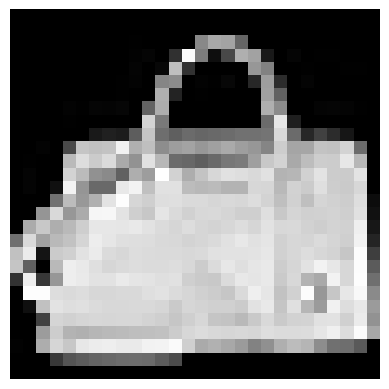

In [65]:
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


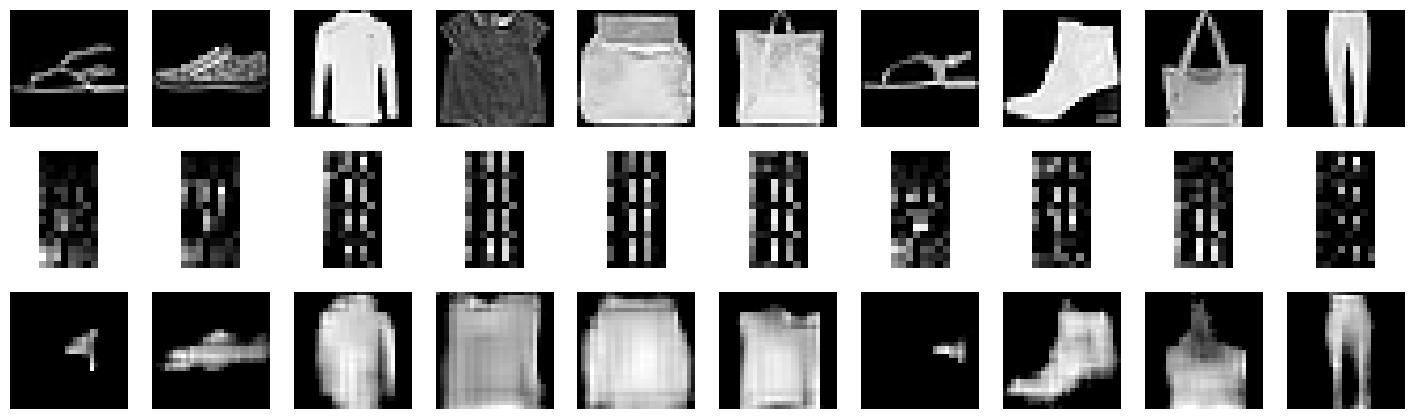

In [95]:
nmr_imagens = 10
largura, altura = 10, 1

plt.figure(figsize=(18, 18))
for i in range(nmr_imagens):

    # Exibir imagem atual
    img_atual = x_test[np.random.randint(0, x_test.shape[0])]
    img_atual *= 255

    ax = plt.subplot(10,10, i+1)
    plt.imshow(img_atual.reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Exibir imagem com encode
    img_encode = encoder.predict(np.expand_dims(img_atual, axis=0))

    ax = plt.subplot(10,10, i+11)
    plt.imshow(img_encode.reshape(16, 8), cmap='gray')
    plt.axis('off')

    # Exibir decoder

    img_decode = decoder.predict(img_encode)
    ax = plt.subplot(10,10, i+21)
    plt.imshow(img_decode.reshape(28, 28), cmap='gray')
    plt.axis('off')


plt.show()